In [1]:
# Imports
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt
import numpy as np

2022-07-05 16:50:28.888694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-05 16:50:28.888716: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/mnt/carterrhea/carterrhea/M33'  # Path to data cube
cube_name = 'M33_Field7_SN3.merged.cm1.1.0'  # don't add .hdf5 extension
object_name = 'M33_Field7'
redshift = -0.0006  # Redshift of M33
resolution = 5000

In [3]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution, mdn=False)

Reading in data...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:29<00:00,  3.31s/it]

413 873



2022-07-05 16:51:02.306842: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-05 16:51:02.306868: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-05 16:51:02.306885: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-07-05 16:51:02.307106: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Create Deep Image
#cube.create_snr_map(method=2)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 2064/2064 [00:00<00:00, 3104.48it/s]


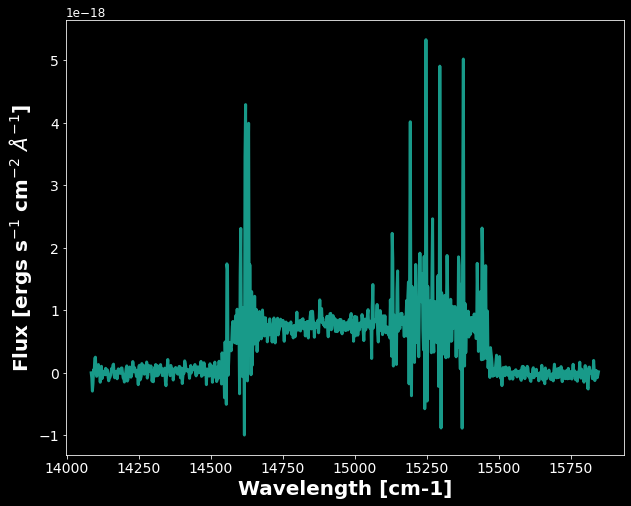

In [5]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum
plt.style.use('dark.mplstyle')
lplt.plot_spectrum(bkg_axis, bkg_sky)
plt.savefig('background_SN3_presentation.png')

In [6]:
# Fit!
vel_map, broad_map, flux_map, chi2_fits = cube.fit_cube(['Halpha', 'NII6583', 'NII6548', "SII6716", "SII6731"], 'sincgauss',
                                                        [1,1,1,1,1], [1,1,1,1,1],
                                                        1200, 1350, 1700, 1900,
                                                        #1275, 1280, 1775, 1780,
                                                        bkg=bkg_sky, binning=1,
                                                        uncertainty_bool=False, n_threads=1
                                                       )

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [2:01:22<00:00, 36.41s/it]


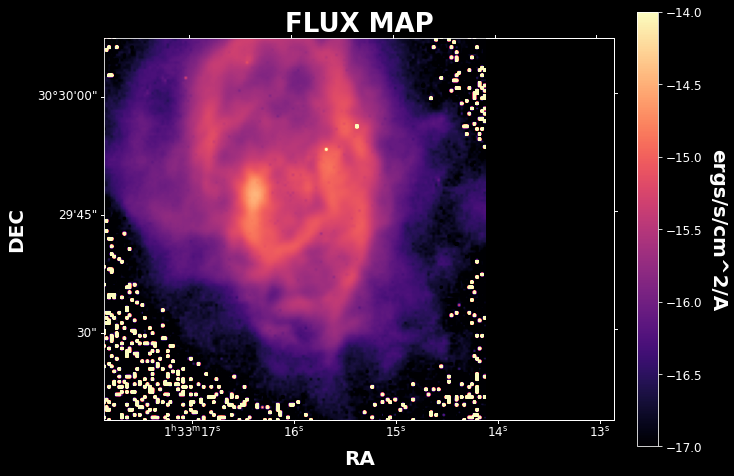

In [7]:
lplt.plot_map(flux_map[:,:,0], 'flux', cube_dir, cube.header, clims=[-17, -14])

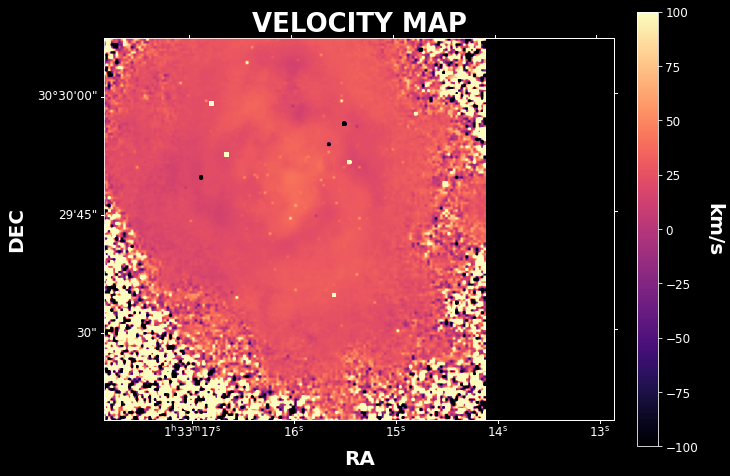

In [8]:
lplt.plot_map(vel_map[:,:,0], 'velocity', cube_dir, cube.header, clims=[-100,100])

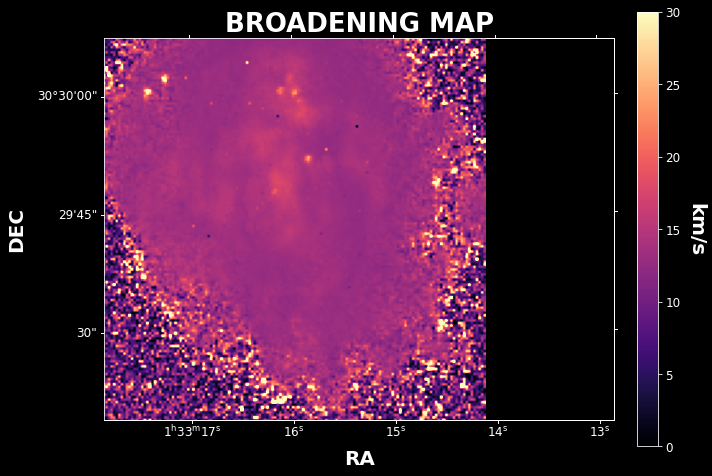

In [9]:
lplt.plot_map(broad_map[:,:,0], 'broadening', cube_dir, cube.header, clims=[0,30])

In [10]:
# Fit!
vel_map_fr, broad_map_fr, flux_map_fr, chi2_fits_fr = cube.fit_cube(['Halpha', 'NII6583', 'NII6548', "SII6716", "SII6731"], 'sincgauss',
                                                        [1,1,1,1,1], [1,1,1,1,1],
                                                        1200, 1350, 1700, 1900,
                                                        #1275, 1280, 1775, 1780,
                                                        bkg=bkg_sky, binning=1,
                                                        uncertainty_bool=False, n_threads=1,
                                                        initial_values=[vel_map[:,:,0], broad_map[:,:,0]]
                                                       )

Initial values


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [10:33<00:00,  3.17s/it]


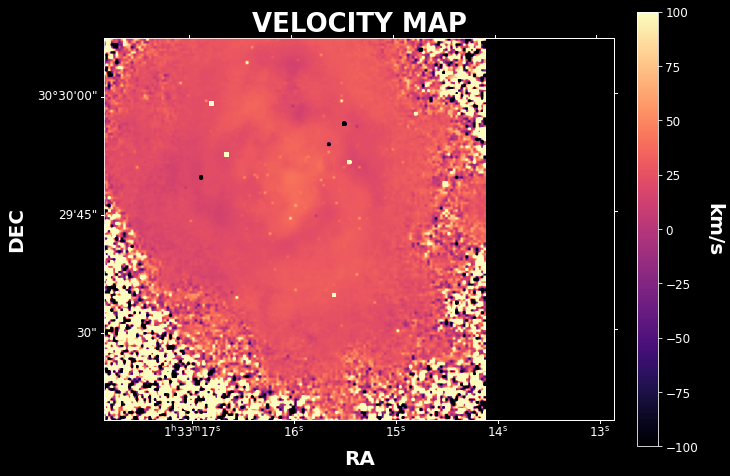

In [11]:
lplt.plot_map(vel_map_fr[:,:,0], 'velocity', cube_dir, cube.header, clims=[-100,100])

In [12]:
vel_map_fr

array([[[ 215.31314 ,  215.31314 ,  215.31314 ,  215.31314 ,
          215.31314 ],
        [-157.11096 , -157.11096 , -157.11096 , -157.11096 ,
         -157.11096 ],
        [ 325.59552 ,  325.59552 ,  325.59552 ,  325.59552 ,
          325.59552 ],
        ...,
        [ 335.32742 ,  335.32742 ,  335.32742 ,  335.32742 ,
          335.32742 ],
        [ 132.38446 ,  132.38446 ,  132.38446 ,  132.38446 ,
          132.38446 ],
        [ 136.46872 ,  136.46872 ,  136.46872 ,  136.46872 ,
          136.46872 ]],

       [[ 343.63232 ,  343.63232 ,  343.63232 ,  343.63232 ,
          343.63232 ],
        [-201.1542  , -201.1542  , -201.1542  , -201.1542  ,
         -201.1542  ],
        [ 122.27044 ,  122.27044 ,  122.27044 ,  122.27044 ,
          122.27044 ],
        ...,
        [ -72.65827 ,  -72.65827 ,  -72.65827 ,  -72.65827 ,
          -72.65827 ],
        [ 135.98296 ,  135.98296 ,  135.98296 ,  135.98296 ,
          135.98296 ],
        [ 400.55063 ,  400.55063 ,  400.55063 , 